# Data Visualization:  New York Ford Go Bike 2019
## by Eya Sahli



> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.
In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.he system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
For my dataset in this project , I choosed to work on New York Ford Go Bike data . Let's see what we'll find !

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)


%matplotlib inline

# Data Gathering 

there are 12 datasets for Fordgobike Baywheels data , we're going to merge those into one.

In [2]:
#With the help of glob and os we're merging the 12 datasets into single master dataset
path ='C:/Users/aya/Documents/NYC tripdata'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(path, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
result.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1


In [3]:
#exporting to csv
result.to_csv('NYCfordgo_2019.csv', index = False)
#reading the csv file
df= pd.read_csv('NYCfordgo_2019.csv')

In [4]:
#structure of the dataset
print(df.shape)
print(df.dtypes)
df.head(10)

(404947, 15)
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
5,737,2019-01-01 12:56:53.2040,2019-01-01 13:09:11.0400,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,-74.049638,29447,Subscriber,1993,1
6,917,2019-01-01 13:03:44.7760,2019-01-01 13:19:02.7690,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,-74.066611,29299,Subscriber,1986,1
7,3248,2019-01-01 13:12:03.1280,2019-01-01 14:06:12.0400,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,29495,Subscriber,1992,1
8,3168,2019-01-01 13:13:12.0450,2019-01-01 14:06:00.4110,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,26312,Customer,1969,0
9,353,2019-01-01 17:07:44.6670,2019-01-01 17:13:38.2640,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,26212,Subscriber,1994,1


### What is the structure of your dataset?

> the dataset contains 404947 trips and 15 columns/features , including the duration in seconds , user type , gender ..

### What is/are the main feature(s) of interest in your dataset?

> Im interested in knowing how are the trips distributed over time , as well as the characteristics of the riders ( gender , age , usertype , etc..) and the realtionship between the two features of interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> there are plenty of features in this dataset that I think will be extremely helpful , for instance , trip duration in seconds from which we're going to extract trip durations in minutes , as well as the date of birth column which we will use to extract the ages of the riders , as well as gender and usertype columns.

# Data Cleaning 

although this dataset is pretty clean , there are things that we can do to make working with more easier . to meet our previously outlined investigation goals , we're going to need to change some datatypes , drop some unneeded columns and add others.

### Datatypes conversion 

In [5]:
#converting starttime and stoptime to datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [6]:
#converting start station id , end station, bikeid and gender  to object
df['start station id'] = df['start station id'].astype('str')
df['end station id'] = df['end station id'].astype('str')
df['bikeid'] =df['bikeid'].astype('str')
df['gender'] =df['gender'].astype('str')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 0 to 404946
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             404947 non-null  int64         
 1   starttime                404947 non-null  datetime64[ns]
 2   stoptime                 404947 non-null  datetime64[ns]
 3   start station id         404947 non-null  object        
 4   start station name       404947 non-null  object        
 5   start station latitude   404947 non-null  float64       
 6   start station longitude  404947 non-null  float64       
 7   end station id           404947 non-null  object        
 8   end station name         404947 non-null  object        
 9   end station latitude     404947 non-null  float64       
 10  end station longitude    404947 non-null  float64       
 11  bikeid                   404947 non-null  object        
 12  usertype        

datatypes converted successfully !

## changing some column names 

start station name and end station name are invalid , we need to fill in with underscores.

In [8]:
#renaming the columns names
df = df.rename({"start station name":"start_station_name"}, axis='columns')
df = df.rename({"end station name":"end_station_name"}, axis='columns')                
#testing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 0 to 404946
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             404947 non-null  int64         
 1   starttime                404947 non-null  datetime64[ns]
 2   stoptime                 404947 non-null  datetime64[ns]
 3   start station id         404947 non-null  object        
 4   start_station_name       404947 non-null  object        
 5   start station latitude   404947 non-null  float64       
 6   start station longitude  404947 non-null  float64       
 7   end station id           404947 non-null  object        
 8   end_station_name         404947 non-null  object        
 9   end station latitude     404947 non-null  float64       
 10  end station longitude    404947 non-null  float64       
 11  bikeid                   404947 non-null  object        
 12  usertype        

### Adding in new columns 

adding a new column for trip duration in minutes .

In [9]:
#making a new column for trip duration in minutes
df['duration_in_minutes'] = df['tripduration']/60
#testing
df[['tripduration','duration_in_minutes']].sample(5)

,tripduration,duration_in_minutes
311964,207,3.450000
44957,529,8.816667
191041,466,7.766667
300305,303,5.050000
245297,422,7.033333


In [10]:
#creating a column for the month
df['month'] = df['starttime'].dt.month

In [11]:
#creating a column for the hour
df['hour'] = df['starttime'].dt.hour

In [12]:
#testing
df[['starttime' ,'hour' , 'month']].sample(5)

,starttime,hour,month
311410,2019-09-30 15:39:57.967,15,9
147208,2019-06-12 20:24:32.600,20,6
336620,2019-10-18 05:54:40.680,5,10
165498,2019-06-27 15:52:08.319,15,6
91491,2019-04-29 08:47:04.654,8,4


according to The ISO/IEC 5218 standard updates , in gender , 1 stands for male , 2 for female , 0 for not known and 9 for not applicable , after converting gender column to object , we can know replace each value with a more clear represenation of gender .

In [13]:
#replacing gender codes with female , male and not known .
df['gender']=df['gender'].str.replace('1','male')
df['gender']=df['gender'].str.replace('2','female')
df['gender']=df['gender'].str.replace('0','not known')

In [14]:
#creating a column for age
df['age']=2019-df['birth year']
#testing
df[['birth year','age']].sample(5)

,birth year,age
176209,1967,52
357952,1988,31
303765,1985,34
377299,1954,65
398629,1968,51


In [15]:
#creating a column for age range
bins = [12, 18, 36,56, 66, 150]
labels = ['12-17', '18-35', '36-55', '56-65', '66+']
labels1 = ['Teen', 'Young adult', 'Middle adult', 'Old adult', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins, labels = labels1 ,include_lowest = True)
#testing our grouping
df[['age','age_group']].sample(5)

,age,age_group
197023,53,Middle adult
73490,47,Middle adult
354828,29,Young adult
25599,28,Young adult
179229,24,Young adult


In [16]:
#dropping unneeded columns for my analysis 
df.drop(['start station latitude','start station longitude','end station latitude' ,'end station longitude'], axis=1, inplace=True)

In [17]:
#taking a final look at our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404947 entries, 0 to 404946
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tripduration         404947 non-null  int64         
 1   starttime            404947 non-null  datetime64[ns]
 2   stoptime             404947 non-null  datetime64[ns]
 3   start station id     404947 non-null  object        
 4   start_station_name   404947 non-null  object        
 5   end station id       404947 non-null  object        
 6   end_station_name     404947 non-null  object        
 7   bikeid               404947 non-null  object        
 8   usertype             404947 non-null  object        
 9   birth year           404947 non-null  int64         
 10  gender               404947 non-null  object        
 11  duration_in_minutes  404947 non-null  float64       
 12  month                404947 non-null  int64         
 13  hour          

In [18]:
#taking a look at our final results
df.head()

,tripduration,starttime,stoptime,start station id,start_station_name,end station id,end_station_name,bikeid,usertype,birth year,gender,duration_in_minutes,month,hour,age,age_group
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,3214,Essex Light Rail,29612,Subscriber,1993,male,3.350000,1,3,26,Young adult
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,3638,Washington St,29213,Subscriber,1972,female,8.416667,1,5,47,Middle adult
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,3192,Liberty Light Rail,26164,Subscriber,1985,male,12.600000,1,10,34,Young adult
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,3638,Washington St,29672,Customer,1969,not known,26.250000,1,12,50,Middle adult
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,3638,Washington St,29522,Customer,1969,not known,26.100000,1,12,50,Middle adult


now that our dataset is perfectly cleaned , we're ready to perform our analysis !

In [19]:
df.to_csv(r'Documents\cleaned_NYCfordgo.csv' , index = False)

In [20]:
#reading the cleaned newyork fordgo file
df = pd.read_csv('cleaned_NYCfordgo.csv')

## Univariate Exploration

> In this section, Im gonna investigate distributions of individual variables.

## Trip related Questions :

## what is the distribution of trips monthly ? 

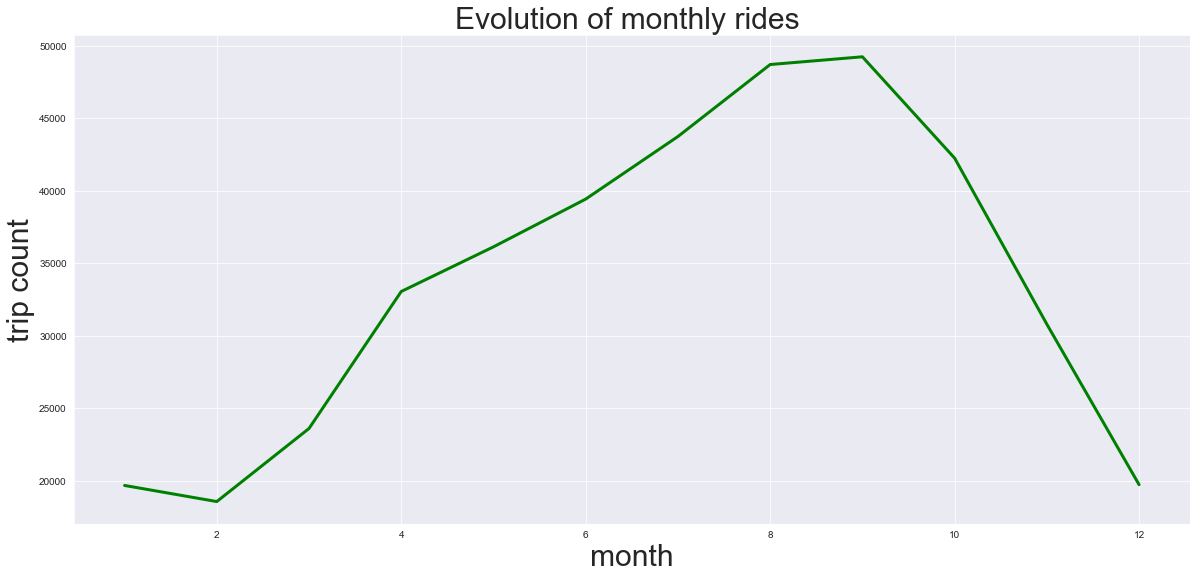

In [21]:
monthly_dist=df.month.value_counts()
#setting the style
sb.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sb.lineplot(data=monthly_dist , color='Green', linewidth=3)
#setting the plot labels and title
plt.title('Evolution of monthly rides ', fontsize = 30)
plt.xlabel('month', fontsize = 30)
plt.ylabel('trip count', fontsize = 30);

monthly rides decrease from January to February to follow a steady increase reaching nearly 50000 in September , then decreasing again to approximately 20000 rides in december . this evolution is no surprise , given that weather is a determining factor in whether or not to bike ride , that's why winter and fall seasons registred the lowest number of bike rides along the year.

## what is the distribution of trips during the day ? 

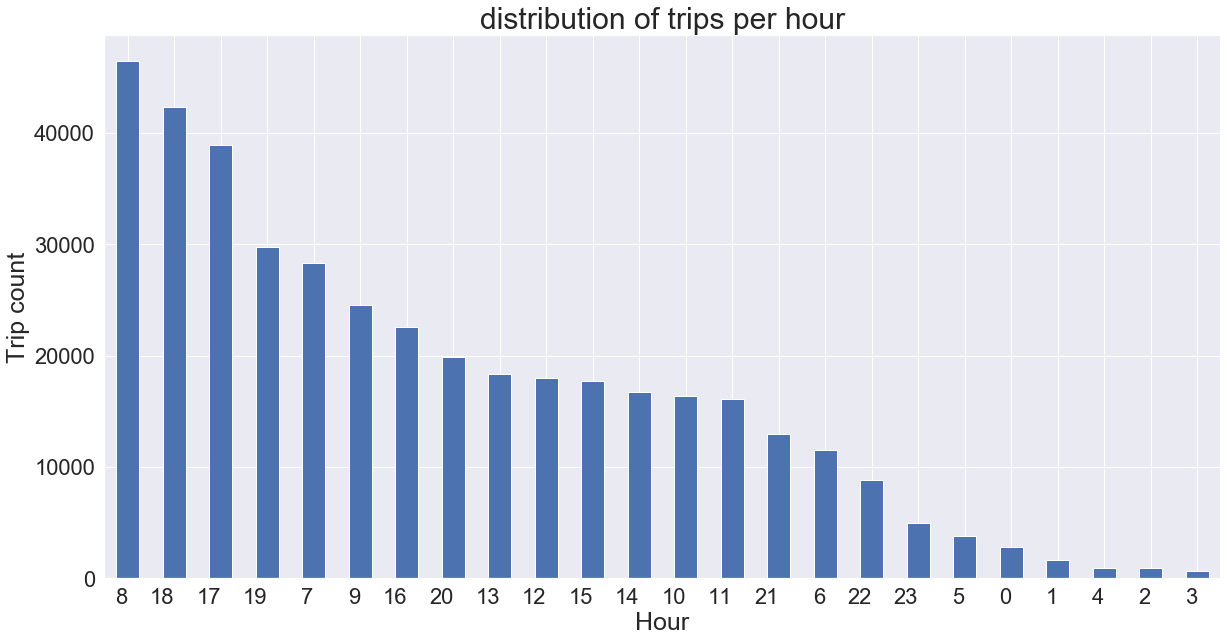

In [22]:
#calculating trip distribution  
daily_dist=df.hour.value_counts()
#setting the style
sb.set_style("darkgrid")
sb.set(font_scale = 2)
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 10));
daily_dist.plot(kind='bar'  );
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=0, horizontalalignment='right')
#setting the plot's labels and title
plt.title('distribution of trips per hour', fontsize = 30)
plt.xlabel('Hour', fontsize = 25)
plt.ylabel('Trip count', fontsize = 25);

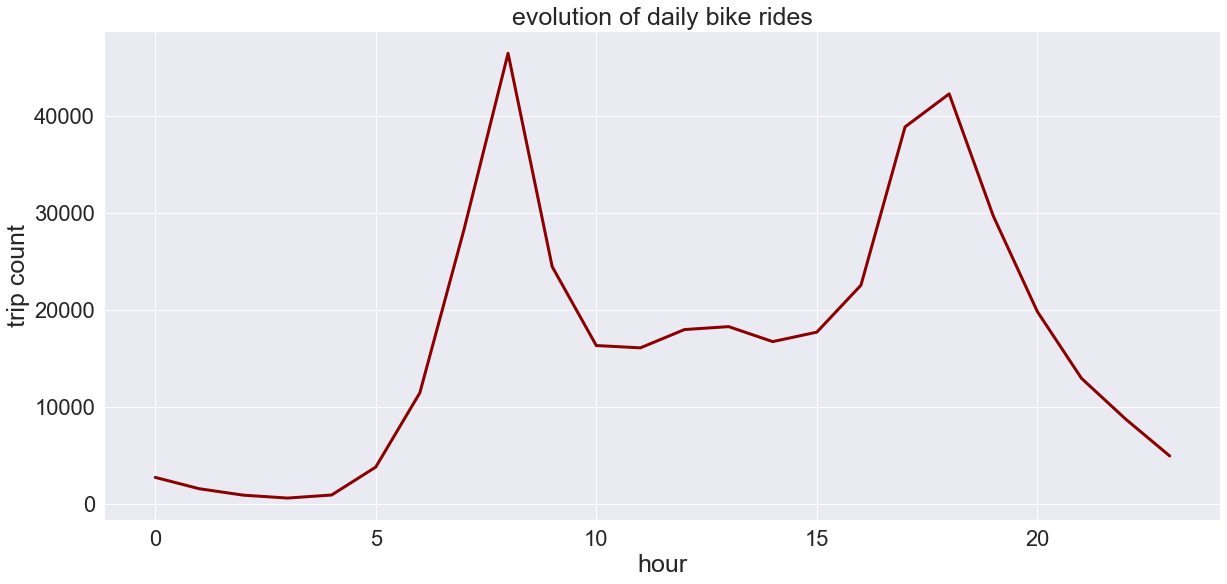

In [23]:
#setting the style
sb.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sb.lineplot(data=daily_dist , color='DarkRed', linewidth=3)
#setting the plot labels and title
plt.title('evolution of daily bike rides', fontsize = 25)
plt.xlabel('hour', fontsize = 25)
plt.ylabel('trip count', fontsize = 25);

the distribution per hour shows that most trips occur at 8 am with a total that depasses 40000 trips , followed by 6pm , 5pm and 7am . these results are no surprise , trips at 8am are more likely trips to school or workplace , meanwhile trips at 5 and 6pm are more likely trips from school and workplace . It is worth noting that the least trips occurs at night between midnight and 4am , which is pretty expected , you can't take a bike trip when you're asleep !

## what is the distribution of trips in minutes duration ?

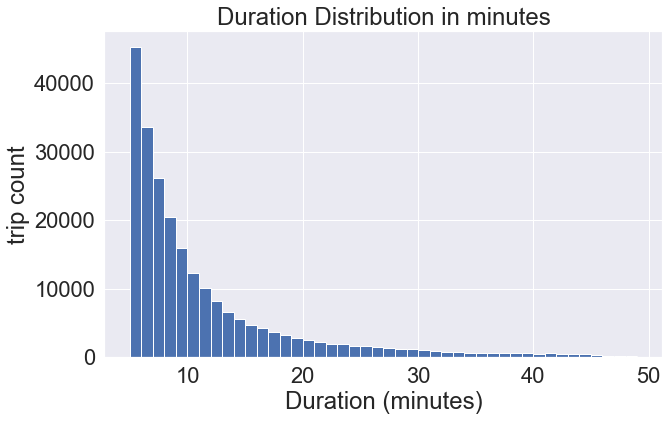

In [24]:
plt.figure(figsize=(10,6))
bins = np.arange(5, 50, 1)
plt.hist(data=df, x='duration_in_minutes', bins=bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('trip count')
plt.title('Duration Distribution in minutes');

the histogram aboves shows that people tend to take shorter rides , with most rides falling under 10 minutes of duration and under 5 minutes even , the number of trips decreases with duration , which is also pretty expected !

## Bikers related Questions

### what is the distribution of Bikers' gender ? 

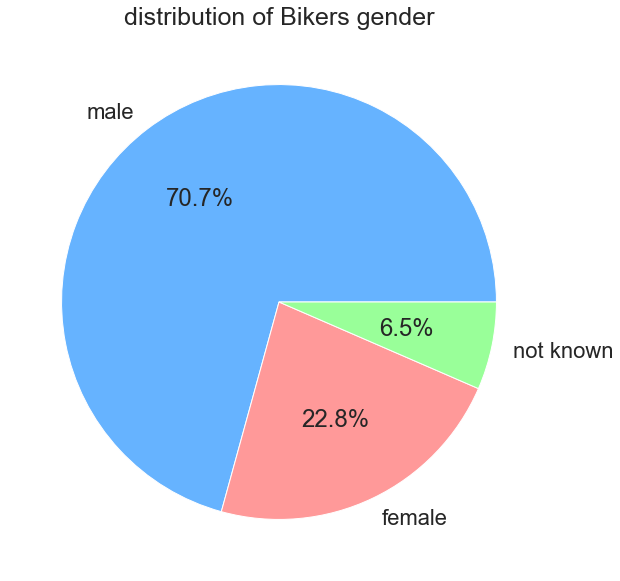

In [25]:
gender_dist=df.gender.value_counts()
#creating a list of colors to use
colors = ['#66b3ff','#ff9999','#99ff99']
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 10));
gender_dist.plot(kind='pie' , autopct='%1.1f%%' , colors=colors);
#setting the plot's title
plt.title('distribution of Bikers gender' , fontsize = 25);
plt.ylabel('');

surprisingly , the vast majority of bikers are male , with a dominating percentage of 70.7% , while women make only 22.8% of total bikers , the rest is not known which is due to missing data or maybe people who do not identify as male or female  .
next , I'll be looking into users ages !

## Age and age group distribution 

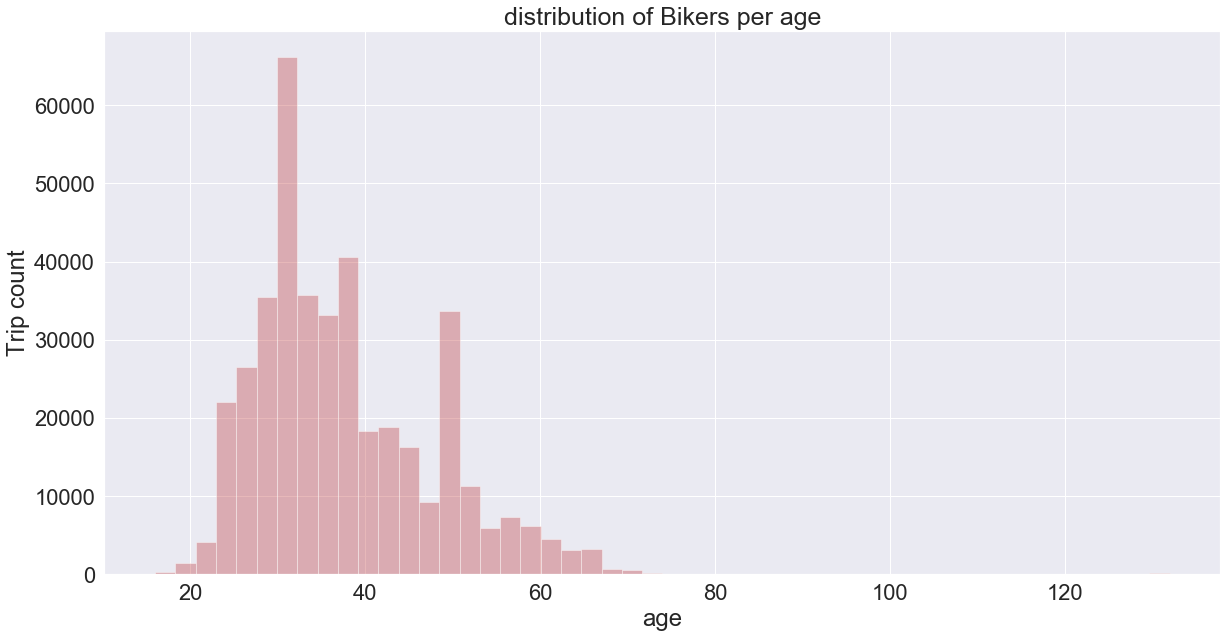

In [26]:
ax = plt.subplots(figsize=(20, 10));
sb.set_color_codes()
ax = sb.distplot(df['age'], color="r"  , kde=False)
plt.title('distribution of Bikers per age' , fontsize = 25);
plt.ylabel('Trip count');

as we can see in the histogram above , the least number of trips are taken by the under 20 and over mid 60 , while in between , trips increase and decrease inconsistenly ,with people in their thirties taking the most trips , let's see with age group !

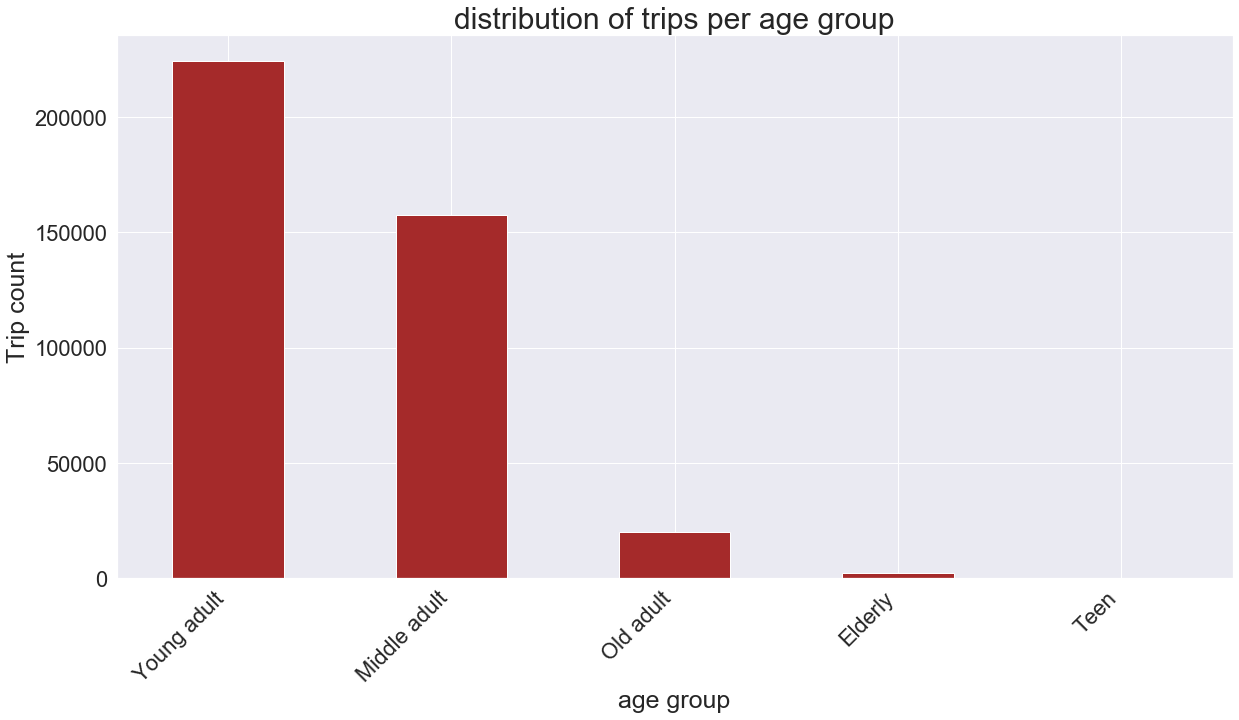

In [27]:
#calculating age group distribution  
age_group_dist=df.age_group.value_counts()
#setting the style
sb.set_style("darkgrid")
sb.set(font_scale = 2)
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 10));
age_group_dist.plot(kind='bar' ,color="brown" );
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the plot's labels and title
plt.title('distribution of trips per age group', fontsize = 30)
plt.xlabel('age group', fontsize = 25)
plt.ylabel('Trip count', fontsize = 25);

in my analysis , I choosed to set the following values with their respective age range :

Teen : 12-17 , Young adult : 18-35 ,Middle adult: 36-55 ,Old adult: 56-65 , Elderly: 66+ . 

it is no surprise that Young adults take the most trips since Young adults tend to be the strongest and the healthiest , what is surprising though , is that Teens take the least trips , which tells me that the majority of these trips are taken more to workforce and even colleges , than high schools .
what about usertype now ?

## the distribution of bikers per usertype : subscriber or customer ? 

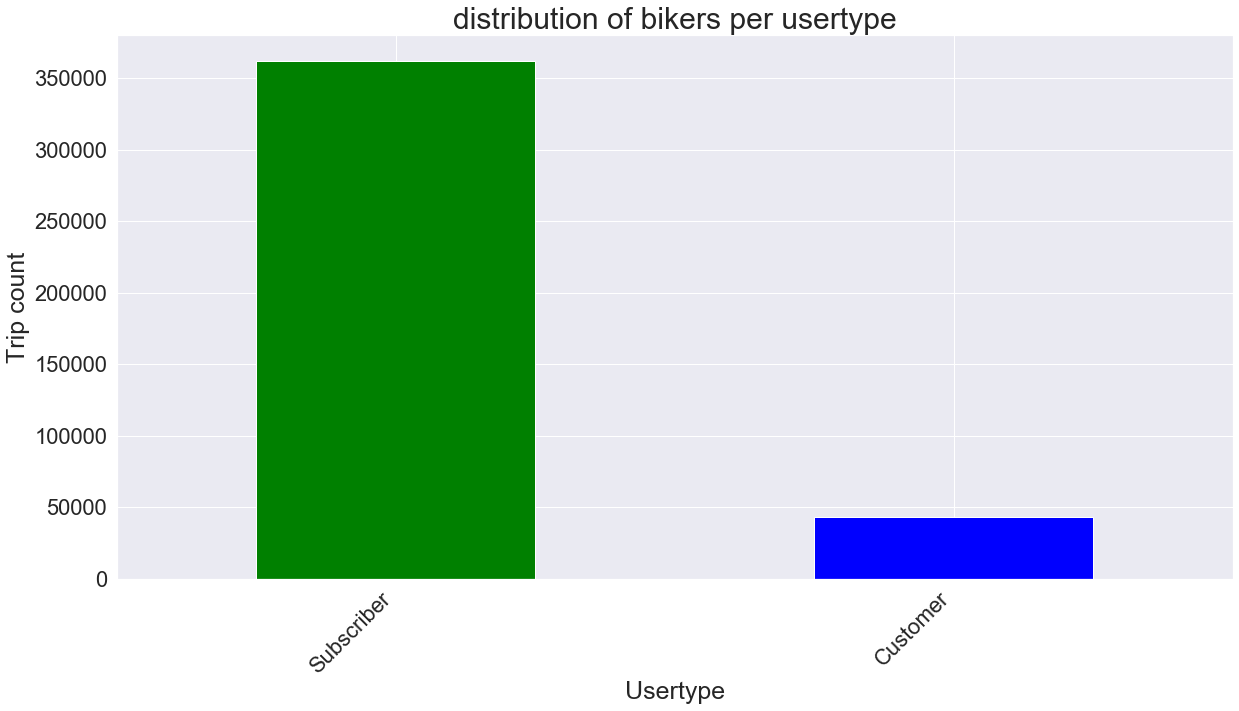

In [28]:
#calculating trip distribution  
usertype_dist=df.usertype.value_counts()
#creating a list of colors to use in our plot
color_list=['Green' ,'Blue'  ]
#setting the style
sb.set_style("darkgrid")
sb.set(font_scale = 2)
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 10));
usertype_dist.plot(kind='bar' ,color=color_list );
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the plot's labels and title
plt.title('distribution of bikers per usertype', fontsize = 30)
plt.xlabel('Usertype', fontsize = 25)
plt.ylabel('Trip count', fontsize = 25);

wow ! the number of subscribers is nearly 7 times  the number of customers ! I think that this may mean that the vast majority of the users are taking bike trips regularly , which also reinforces my theory that most bike rides are taken to work or college , somewhere we go to on a daily basis !

### Discussing the distribution(s) of my variable(s) of interest : 

for my variables of interests , including duration in minutes , hour , month , age , age group , gender and usertype , there weren't really any unusual parts , so i didn't really perform any particular transformations . 

### Discussing any unusual distributions :

there weren't really any unusual distributions , i had to extract the month and the hour to determine the distribution of rides monthly and hourly, as well as i had to calculate the age and the duration in minutes , all to make my exploration easier and my graphs more informative .

## Bivariate Exploration

> In this section, Im investigating relationships between pairs of variables in my
data that I have introduced inthe previous section (univariate exploration).

now im interested in knowing the interactions between duration in minutes and other variables , let's see what we'll find !

## who spends more time on trips ? subscribers or customers ?

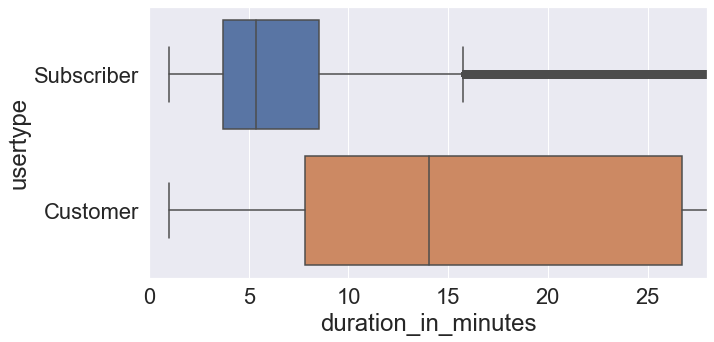

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
#plotting the data into a box plot
ax=sb.boxplot(x=df["duration_in_minutes"], y=df["usertype"])
#limit the output to 95th percentile
plt.xlim(0,df["duration_in_minutes"].quantile(0.95));

it looks like customers spend more time on trips than subscribers , interesting !

## how do bike trips durations change all along the year ?

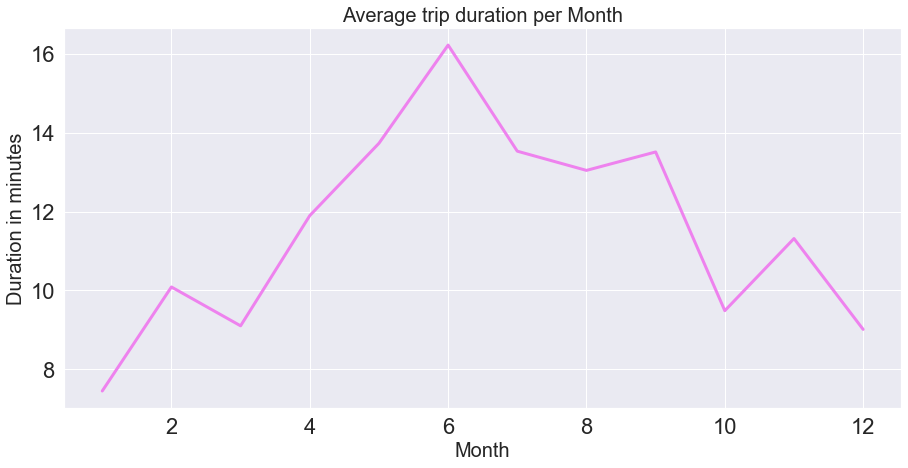

In [44]:
#Visualizing the data in a lineplot
plt.figure(figsize = (15, 7))
sb.lineplot(data = df.sort_values('month'), x = 'month', y = 'duration_in_minutes' , color='violet' , ci=None , linewidth=3);
plt.xticks(rotation = 0);
plt.title('Average trip duration per Month', fontsize = 20);
plt.ylabel('Duration in minutes',fontsize = 20);
plt.xlabel('Month',fontsize = 20);

it comes as no surprise that people would often spend more time outside when it's nice and sunny , here we see that the average trip duration is increasing steadily in spring season reaching more than 16 minutes average , to decrease a bit in summer to increase again near september than decrease steadily to december where trip duration doesn't exceed 10 minutes for the whole winter. 

##  how do bike trips durations change during the day ?

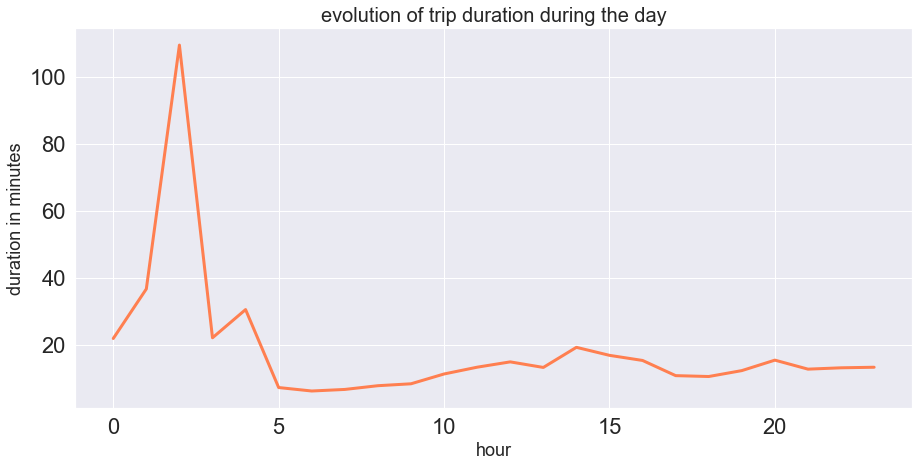

In [31]:
#Visualizing the data in a lineplot
plt.figure(figsize = (15, 7))
sb.lineplot(data =df.sort_values('hour'), x = 'hour', y = 'duration_in_minutes' ,color="coral" ,ci=None , linewidth=3 );
plt.xticks();
plt.title('evolution of trip duration during the day', fontsize = 20);
plt.ylabel('duration in minutes',fontsize = 18);
plt.xlabel('hour',fontsize = 18);


it seems like we have many outlirs that cause the average trip duration to be extremely high in the early hours of the day , perhaps this data belongs to people who take really long trips and have to wake up early , the average duration is higher in the early hours , around 5am , it decreases maintaining values under 20 minute sall day long .

## how can we describe trip duration when it comes to age groups ? 

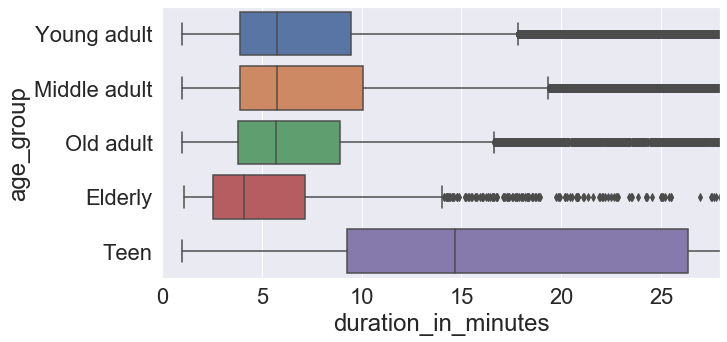

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sb.boxplot(x=df["duration_in_minutes"], y=df["age_group"])
#limit the output to 95th percentile
plt.xlim(0,df["duration_in_minutes"].quantile(0.95));

from the boxplot above , it's safe to say that middle and young adults spend longer time in trips in contrary to elderly and old adults , which is very reasonable as it is always related to health and strength , to endure such long trips . surprisingly , and even though they make a small portion of the dataset , teens are taking relatively longer trips than others !

## which gender has longer trip durations ? 

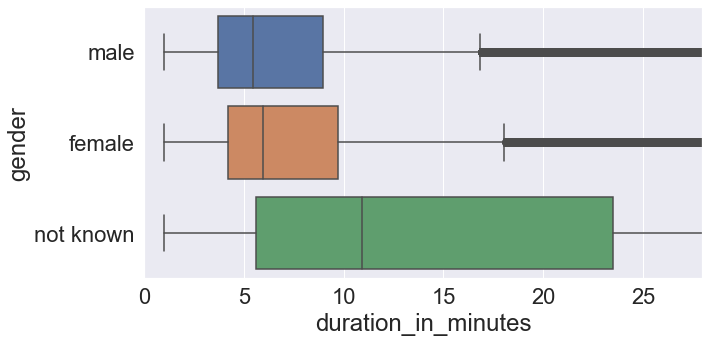

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sb.boxplot(x=df["duration_in_minutes"], y=df["gender"])
#limit the output to 95th percentile
plt.xlim(0,df["duration_in_minutes"].quantile(0.95));

judging by the boxplot above , we can see that there is no huge difference in men and women trip durations , even though females tend to take slightly longer rides.

###  Summary of some of the relationships you observed in this part of the investigation :

> trip durations is different from feature to feature , for instance , i have noticed that it differs from an age group to another , making teens and middle adults the ones with the longest trip rides and the old adults and elderly with the shortest , as well as for usertype , customers tend to spend more time than subscribers . when it comes to months and hours , the vizualsations also offered interesting insights that showed that the longest trips often occur at spring and in the early hours . and those are the only relationships i investigated within this section as i didn't go further into the relationships of the variables that are not my features of interest.

## Multivariate Exploration

> In this section , im creating plots of three or more variables to investigate my data even
further. 
im gonna focus on duration , age group and usertype and month .

## Visualizing the relationship between duration , age group and month


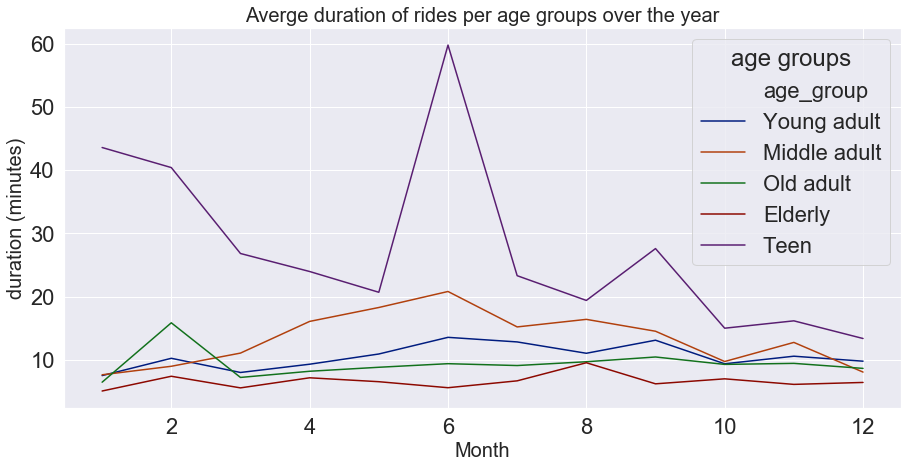

In [34]:
#Visualizing the relationship between duration , age group and month
plt.figure(figsize = (15, 7))
sb.lineplot(data = df.sort_values('month'), x = 'month',y='duration_in_minutes',
             hue = 'age_group', palette = 'dark', ci = None);
plt.title('Averge duration of rides per age groups over the year' , fontsize =20)
plt.legend(title = 'age groups');
plt.xlabel('Month' ,fontsize =20);
plt.ylabel('duration (minutes)',fontsize =20);

as we saw in the bivariate section , teens , followed by middle adults and young adults have the longer trips , but it seems that teens tend to have even longer trips in june and in spring/seasons !

## Visualizing the relationship between duration , age group and hour
 

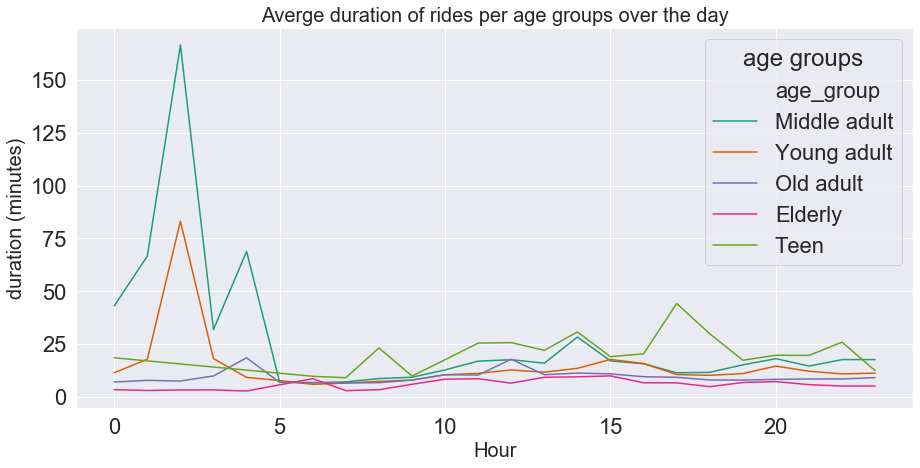

In [35]:
#Visualizing the relationship between duration , age group and hour
plt.figure(figsize = (15, 7))
sb.lineplot(data = df.sort_values('hour'), x = 'hour',y='duration_in_minutes',
             hue = 'age_group', palette = 'Dark2', ci = None);
plt.title('Averge duration of rides per age groups over the day' , fontsize =20)
plt.legend(title = 'age groups');
plt.xlabel('Hour' ,fontsize =20);
plt.ylabel('duration (minutes)' ,fontsize =20);

and while teens take the longer trips in spring/summer seasons , middle , followed by young adults take the longer trips in the early hours , while elderly , teens and older adults take shorter trips at these hours , as i mentioned earlier , this can be related to adults going far to work .

## Visualizing the relationship between duration , usertype and month


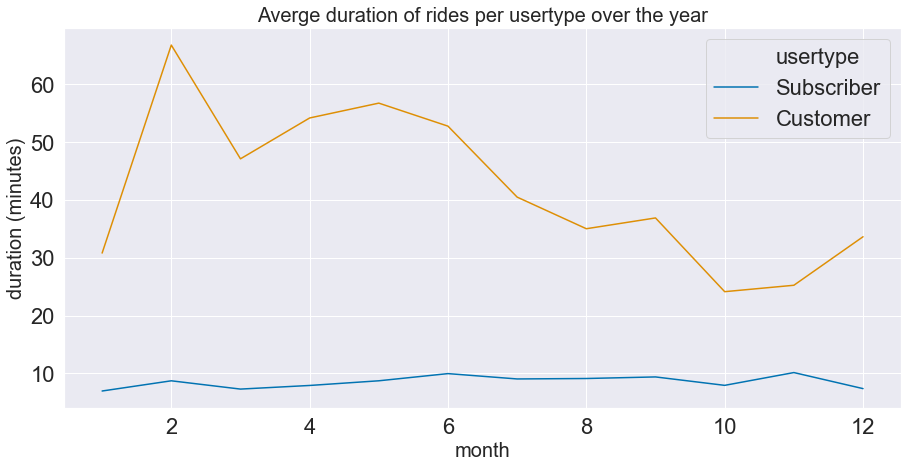

In [36]:
#Visualizing the data between duration , usertype and month 
plt.figure(figsize = (15, 7))
sb.lineplot(data = df.sort_values('month'), x = 'month',y='duration_in_minutes',
             hue = 'usertype', palette = 'colorblind', ci = None);
plt.title('Averge duration of rides per usertype over the year' , fontsize =20)
plt.xlabel('month' , fontsize=20);
plt.ylabel('duration (minutes)' , fontsize=20);

interesting results that complete what we saw earlier in the bivariate section , customers do indeed take longer trips , on the contrary , subscribers trips seem to be consistent and short all year round , sounds like it's the regular everyday trip they take ! 

## Visualizing the relationship between duration , gender and hour


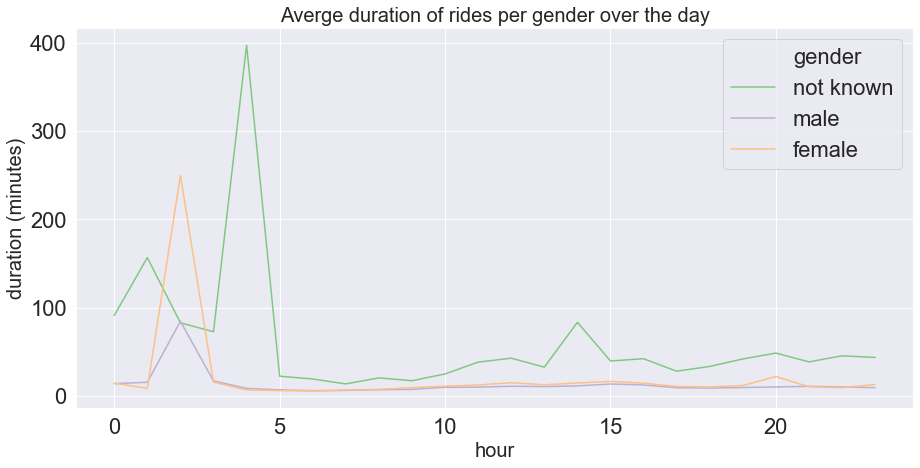

In [37]:
#Visualizing the data between duration , gender and hour 
plt.figure(figsize = (15, 7))
sb.lineplot(data = df.sort_values('hour'), x = 'hour',y='duration_in_minutes',
             hue = 'gender', palette = 'Accent', ci = None);
plt.title('Averge duration of rides per gender over the day' , fontsize =20)
plt.xlabel('hour' , fontsize=20);
plt.ylabel('duration (minutes)' , fontsize=20);

a very surprising turn of events ! females take the longer trips in the early hours , with a duration that reaches 4 hours compared to males' trip durations of nearly on hour and a half ! which can explain the subtle difference in duration we saw in the bivarite section !


###  some of the relationships I observed in this part of the investigation :

> some of the relationships i observed in this part of investigation are the ones between month , age group and duration ,month , age group and hour as well as month usertype and duration , all of which showed expected results  as in the bivariate section , teens , followed by middle adults and young adults have the longer trips compared to the other age groups , and while teens take the longer trips in spring/summer seasons , middle , followed by young adults take the longer trips in the early hours , while elderly , teens and older adults take shorter trips at these hours which can be related to adults going far to work .
when it comes to usertype there were interesting results that complete what we saw earlier in the bivariate section , customers do indeed take longer trips , on the contrary , subscribers trips seem to be consistent and short all year round.

### surprising insights :

> on the surprising side , and through investigating the relationship between duration , gender and hour , it came out that females take the longer trips in the early hours , and not males ! what a revelation ! 